In [98]:

# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# settings
#print(plt.style.available)
plt.style.use(plt.style.available[8])

# read excel
filename = r'data.xlsx'
df = pd.read_excel(filename)
df['fecha'] = pd.to_datetime(df['fecha'])

#creating absolute values for fat, water and muscle
mat = df.to_numpy()[:,1:5]
for row in range(np.shape(mat)[0]):
    mat[row,0:2]=mat[row,0:2] * mat[row,3]/100

# save absolute values to dataframe
df['grasa (kg)']= pd.to_numeric(mat[:,0])
df['agua (kg)']= pd.to_numeric(mat[:,1])
df['musculo (kg)']= pd.to_numeric(mat[:,2])

#%

Plotting stats

[Text(0.5, 1.0, 'musculo (kg)')]

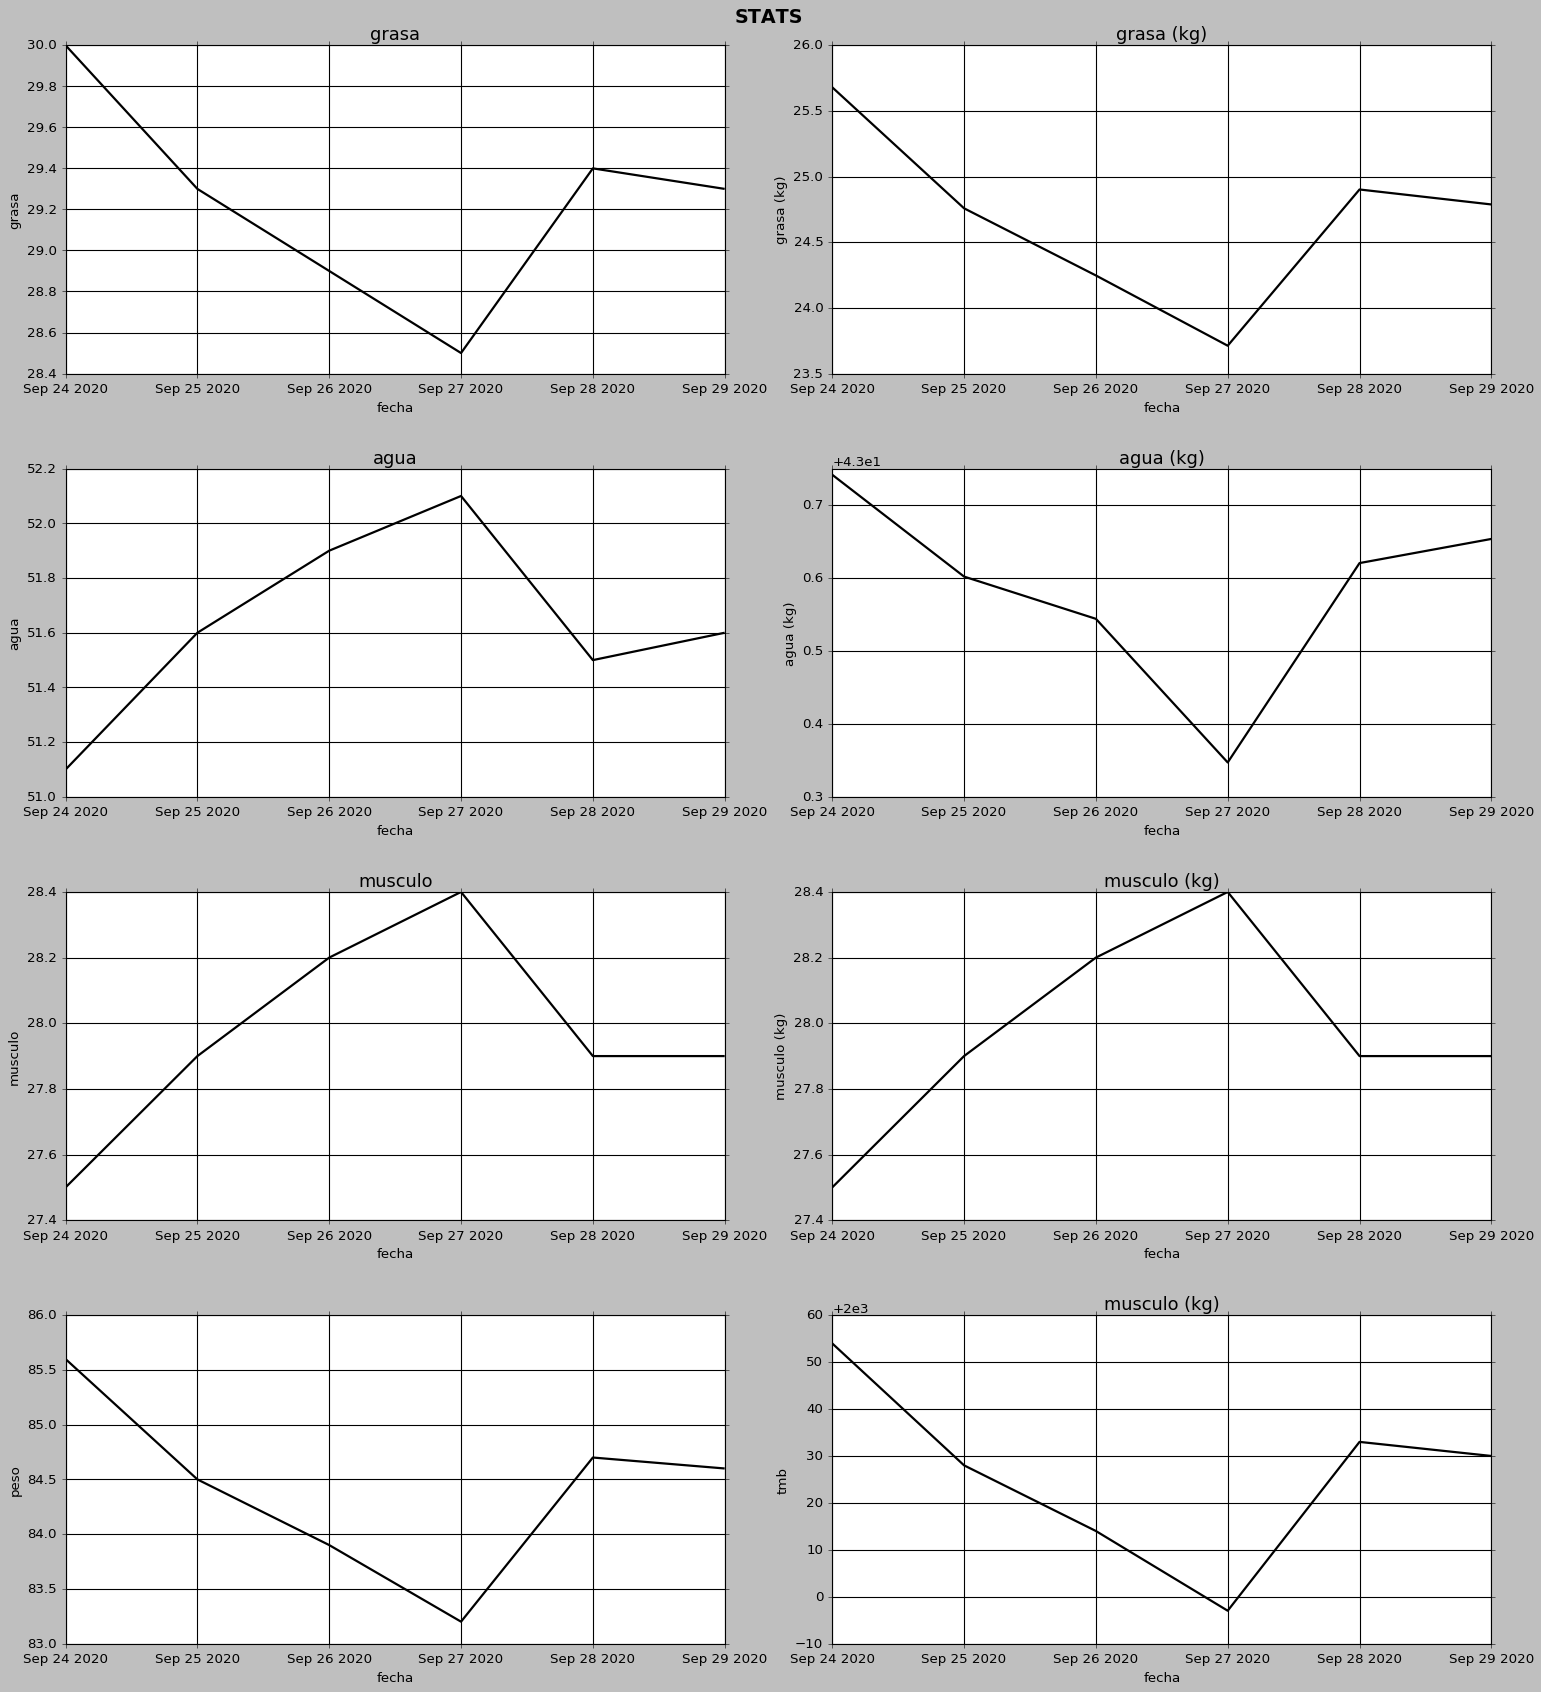

In [99]:
#PLOTTING

f , ax=plt.subplots(4,2,figsize=(20,22))
f.tight_layout(pad=5.0)

f.suptitle('STATS', fontsize='x-large', fontweight='bold')
serie = ['grasa','agua','musculo']
for i in range(3):
    sns.lineplot(
        data=df,
        x='fecha',
        y= serie[i],
        ax = ax[i,0]
    ).set(title=serie[i])
    sns.lineplot(
        data=df,
        x='fecha',
        y= serie[i]+' (kg)',
        ax = ax[i,1]
    ).set(title=serie[i]+' (kg)')

#WEIGHT
sns.lineplot(
    data=df,
    x='fecha',
    y= 'peso',
    ax = ax[3,0]
).set(title='')
sns.lineplot(
    data=df,
    x='fecha',
    y= 'tmb',
    ax = ax[3,1]
).set(title=serie[i]+' (kg)')

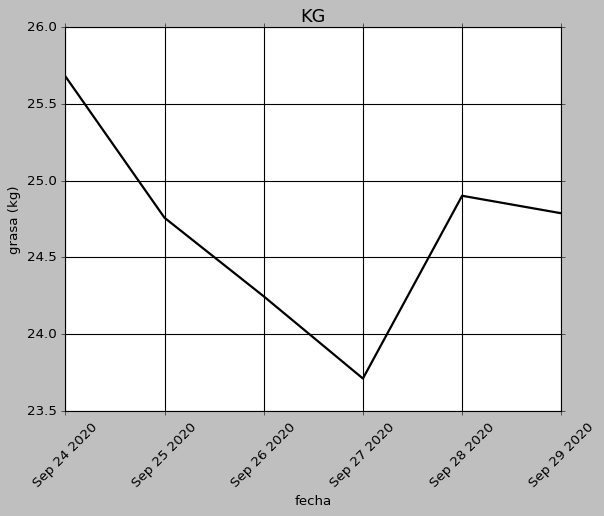

In [100]:

# GRASA

f.suptitle('s', fontsize='x-large', fontweight='bold')

sns.lineplot(
    data=df,
    x='fecha',
    y='grasa (kg)'
).set(title='KG')

plt.xticks(rotation=45)
plt.savefig('img/grasa.png')


plt.show()
plt.close()

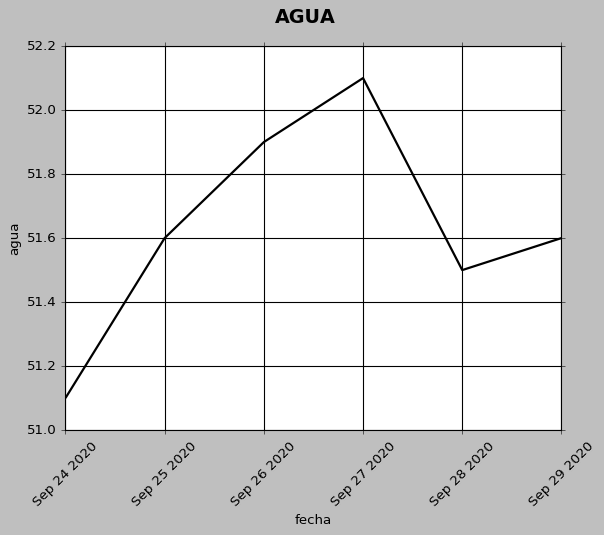

In [101]:

# water graph

fig = plt.figure()
fig.suptitle('AGUA', fontsize='x-large', fontweight='bold')



sns.lineplot(
    data=df,
    x='fecha',
    y='agua'
)

plt.xticks(rotation=45)
plt.savefig('img/agua.png')
plt.show()
plt.close()

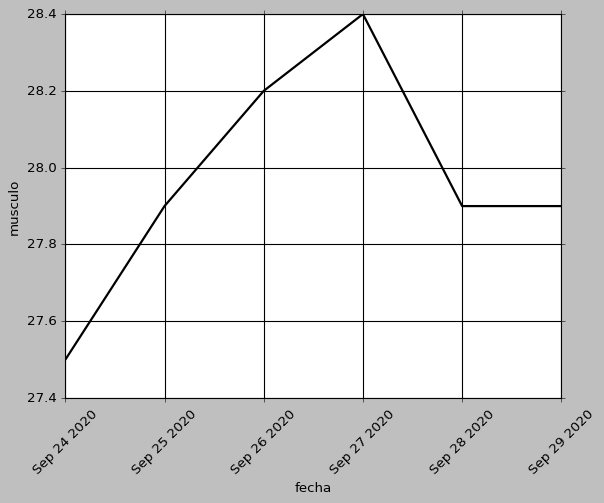

In [102]:
# muscle graph


sns.lineplot(
    data=df,
    x='fecha',
    y='musculo'
)

plt.xticks(rotation=45)
plt.savefig('img/musculo.png')
plt.show()
plt.close()


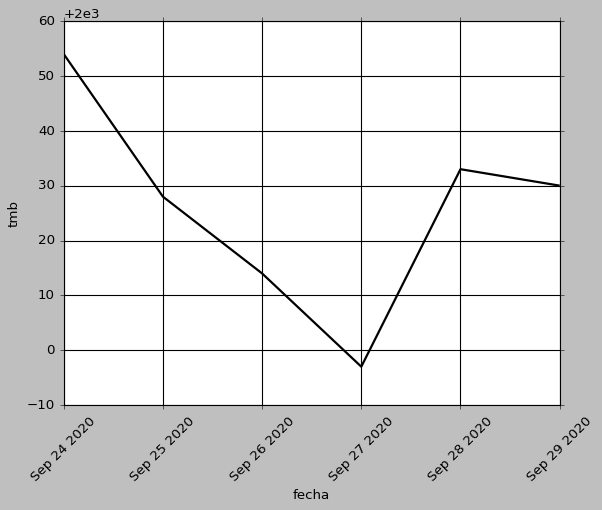

In [103]:
# tmb graph


sns.lineplot(
    data=df,
    x='fecha',
    y='tmb'
)

plt.xticks(rotation=45)
plt.savefig('img/tmb.png')
plt.show()
plt.close()


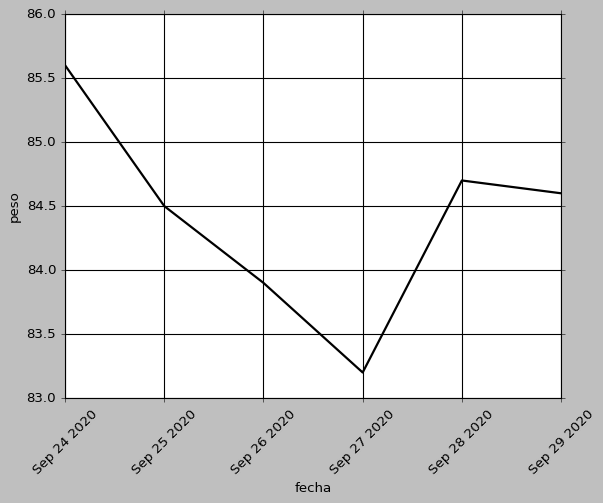

In [104]:
# weight graph



sns.lineplot(
    data=df,
    x='fecha',
    y='peso'
)

plt.xticks(rotation=45)
plt.savefig('img/peso.png')
plt.show()
plt.close()

In [105]:
# summary table
fechas = df.filter('fecha')
fechas
df

fecha  grasa  agua  musculo  peso   tmb WOD?  grasa (kg)  agua (kg)  \
0 2020-09-24   30.0  51.1     27.5  85.6  2054   SI     25.6800    43.7416   
1 2020-09-25   29.3  51.6     27.9  84.5  2028   NO     24.7585    43.6020   
2 2020-09-26   28.9  51.9     28.2  83.9  2014   NO     24.2471    43.5441   
3 2020-09-27   28.5  52.1     28.4  83.2  1997   NO     23.7120    43.3472   
4 2020-09-28   29.4  51.5     27.9  84.7  2033   SI     24.9018    43.6205   
5 2020-09-29   29.3  51.6     27.9  84.6  2030   SI     24.7878    43.6536   

   musculo (kg)  
0          27.5  
1          27.9  
2          28.2  
3          28.4  
4          27.9  
5          27.9

In [106]:
datacols = ['grasa','grasa (kg)','musculo','musculo (kg)','agua','agua (kg)','peso','tmb']
mat = df.filter(datacols).to_numpy()

der = np.diff(mat,axis=0)
der

array([[-7.0000e-01, -9.2150e-01,  4.0000e-01,  4.0000e-01,  5.0000e-01,
        -1.3960e-01, -1.1000e+00, -2.6000e+01],
       [-4.0000e-01, -5.1140e-01,  3.0000e-01,  3.0000e-01,  3.0000e-01,
        -5.7900e-02, -6.0000e-01, -1.4000e+01],
       [-4.0000e-01, -5.3510e-01,  2.0000e-01,  2.0000e-01,  2.0000e-01,
        -1.9690e-01, -7.0000e-01, -1.7000e+01],
       [ 9.0000e-01,  1.1898e+00, -5.0000e-01, -5.0000e-01, -6.0000e-01,
         2.7330e-01,  1.5000e+00,  3.6000e+01],
       [-1.0000e-01, -1.1400e-01,  0.0000e+00,  0.0000e+00,  1.0000e-01,
         3.3100e-02, -1.0000e-01, -3.0000e+00]])

In [107]:
date=[]
for i in range(np.shape(der)[0]):
    print(str(df['fecha'][i])[5:10]+' al '+ str(df['fecha'][i+1])[5:10])
    date.append(str(df['fecha'][i])[5:10]+' al '+ str(df['fecha'][i+1])[5:10])
print (date)
change_df = pd.DataFrame(der,columns=datacols)
change_df.insert(0,'Cambio', date)

change_df

09-24 al 09-25
09-25 al 09-26
09-26 al 09-27
09-27 al 09-28
09-28 al 09-29
['09-24 al 09-25', '09-25 al 09-26', '09-26 al 09-27', '09-27 al 09-28', '09-28 al 09-29']


Cambio  grasa  grasa (kg)  musculo  musculo (kg)  agua  agua (kg)  \
0  09-24 al 09-25   -0.7     -0.9215      0.4           0.4   0.5    -0.1396   
1  09-25 al 09-26   -0.4     -0.5114      0.3           0.3   0.3    -0.0579   
2  09-26 al 09-27   -0.4     -0.5351      0.2           0.2   0.2    -0.1969   
3  09-27 al 09-28    0.9      1.1898     -0.5          -0.5  -0.6     0.2733   
4  09-28 al 09-29   -0.1     -0.1140      0.0           0.0   0.1     0.0331   

   peso   tmb  
0  -1.1 -26.0  
1  -0.6 -14.0  
2  -0.7 -17.0  
3   1.5  36.0  
4  -0.1  -3.0

In [108]:
# rate of change table

